## Zillow Home Sale Anomalie Detection & Prediction
This project aims to detect anomalies in Zillow's home sale data using advanced machine learning techniques. The goal is to identify unusual patterns or deviations in home sale trends for a specific region (e.g., Los Angeles, CA). These anomalies can provide valuable insights into market disruptions, seasonal trends, or external events influencing the housing market.

The project leverages time-series data from Zillow, focusing on weekly home sale metrics over several years. Deep learning models like LSTMs (Long Short-Term Memory) are employed to capture the sequential dependencies and detect anomalies based on deviations from expected patterns.

#### Step 1: Problem Definition
Objective: Identify and explain anomalies in Zillow's home sale data for a specific region.

<b>Questions to Answer:</b>
- What factors contribute to anomalies?
- How can we predict future anomalies effectively?
  

#### Step 2: Data Collection and Preparation
- Load the Zillow dataset containing time-series data for various regions.
- Select a target region (e.g., Los Angeles, CA) and extract relevant columns (weekly metrics).
- Handle missing values (if any).
- Normalize or scale the data for training deep learning models.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data
file_path = 'Metro_mean_doz_pending_uc_sfrcondo_week.csv'  # Adjust to your file's path
zillow_data = pd.read_csv(file_path)

# Preprocessing
# Select a region and filter relevant columns (time-series columns)
region = 'Los Angeles, CA'  # Example region
data = zillow_data[zillow_data['RegionName'] == region].iloc[:, 5:]  # Time-series data

data = data.transpose()  # Transpose to make it suitable for time-series analysis
data.columns = ['Value']
data['Date'] = pd.to_datetime(data.index)
data.reset_index(drop=True, inplace=True)

#### Step 3: Exploratory Data Analysis (EDA)
- Visualize the raw home sales data to identify patterns, trends, and seasonality.
- Analyze statistical properties of the data (mean, variance, etc.).
- Identify any potential anomalies manually as a baseline for comparison.

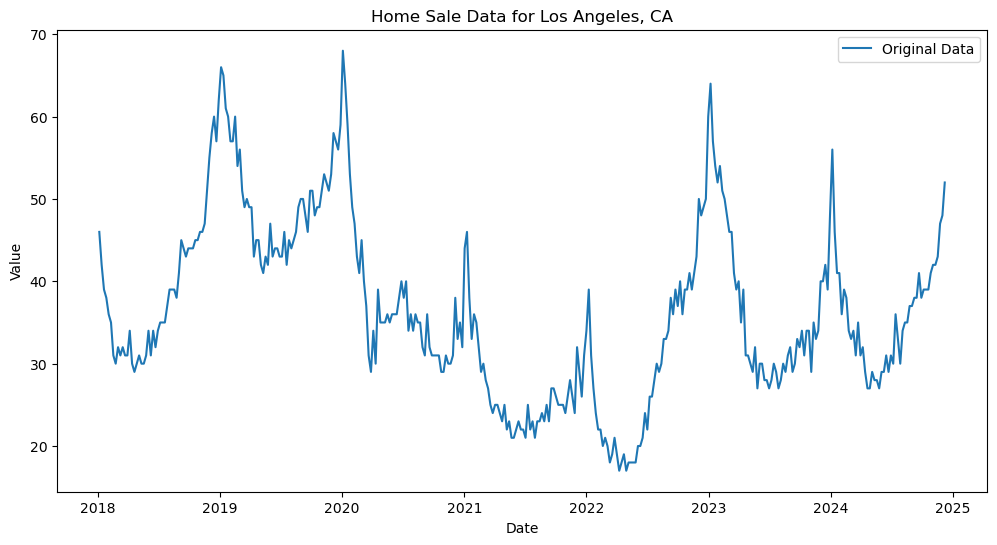

In [3]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Value'], label='Original Data')
plt.title(f"Home Sale Data for {region}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Anomaly Detection using Isolation Forest
# Prepare the data for the model
data['Value_scaled'] = (data['Value'] - data['Value'].mean()) / data['Value'].std()
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['Anomaly'] = isolation_forest.fit_predict(data[['Value_scaled']])
data['Anomaly'] = data['Anomaly'].map({1: 0, -1: 1})

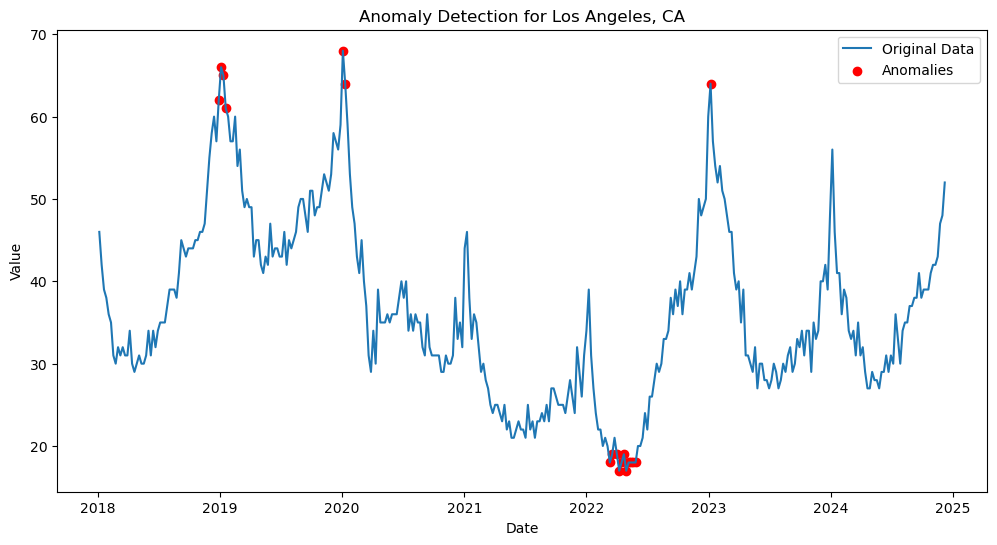

Detected Anomalies:
          Date  Value
51  2018-12-29   62.0
52  2019-01-05   66.0
53  2019-01-12   65.0
54  2019-01-19   61.0
104 2020-01-04   68.0
105 2020-01-11   64.0
218 2022-03-12   18.0
219 2022-03-19   19.0
221 2022-04-02   19.0
222 2022-04-09   17.0
223 2022-04-16   18.0
224 2022-04-23   19.0
225 2022-04-30   17.0
226 2022-05-07   18.0
227 2022-05-14   18.0
228 2022-05-21   18.0
229 2022-05-28   18.0
261 2023-01-07   64.0


In [4]:


# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Value'], label='Original Data')
plt.scatter(data['Date'][data['Anomaly'] == 1],
            data['Value'][data['Anomaly'] == 1],
            color='red', label='Anomalies')
plt.title(f"Anomaly Detection for {region}")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Output detected anomalies
anomalies = data[data['Anomaly'] == 1]
print("Detected Anomalies:")
print(anomalies[['Date', 'Value']])

#### Step 4: Model Selection
- Choose a deep learning model suitable for time-series anomaly detection:
- LSTM (Long Short-Term Memory): Ideal for capturing sequential patterns.
- Autoencoder: Effective for reconstructing normal patterns and identifying deviations.
- Hybrid Models: Combine CNN and LSTM layers to capture both local and sequential patterns.
-

#### Step 5: Data Preparation for Modeling
- Split the dataset into training, validation, and testing sets.
- Create sliding windows of data to capture sequences for input into the model.
- Ensure the training data represents "normal" patterns to help the model distinguish anomalies.

#### Step 6: Model Training
- Train the chosen deep learning model on the prepared sequences.
- Use appropriate loss functions (e.g., mean squared error) and optimizers (e.g., Adam).
- Monitor model performance using validation data to prevent overfitting.

#### Step 7: Anomaly Detection
- Use the trained model to make predictions on the test set.
- Compute reconstruction errors or deviations between predicted and actual values.
- Set a threshold for anomaly detection based on the error distribution (e.g., 95th percentile).

#### Step 8: Evaluate Results
- Compare detected anomalies with known historical events to validate findings.
- Assess the model’s accuracy using metrics like precision, recall, and F1-score.
- Visualize anomalies on the time-series plot for interpretability.

#### Step 9: Insights and External Event Analysis
- Cross-reference detected anomalies with external data:
- Mortgage rate changes.
- Economic indicators.
- Local policy changes or market events.
- Provide explanations for why anomalies occurred and their implications.

#### Step 10: Future Predictions
- Use the trained model to forecast future time-series data and detect potential anomalies.
- Incorporate external data (e.g., economic forecasts) to improve prediction accuracy.

#### Step 11: Reporting and Visualization
- Summarize findings in a clear and concise report.
- Create visualizations to highlight:
- Detected anomalies and their explanations.
- Overall trends and patterns in the dataset.

#### Conclusion

Late 2018 to Early 2019
Anomalies Detected:

Dates: 2018-12-29, 2019-01-05, 2019-01-12, 2019-01-19
Values: 62.0, 66.0, 65.0, 61.0
External Events:

Market Slowdown: In December 2018, Los Angeles experienced a notable decline in home sales, with a 20% drop compared to the same period the previous year. 
CURBED LOS ANGELES
Seasonal Trends: The holiday season typically sees reduced real estate activity, contributing to lower sales volumes.
Impact: The combination of a market slowdown and seasonal factors likely led to the anomalies observed during this period, reflecting decreased buyer activity and a cooling market.

Early 2020
Anomalies Detected:

Dates: 2020-01-04, 2020-01-11
Values: 68.0, 64.0
External Events:

Pre-Pandemic Market Conditions: Before the COVID-19 pandemic's full impact, the housing market was experiencing typical seasonal patterns.
Pandemic Onset: While the global pandemic began affecting various sectors, its impact on the housing market became more pronounced in the subsequent months. 
ZILLOW
Impact: The anomalies in early January 2020 may reflect normal seasonal variations before the pandemic's disruptive effects became evident in the housing market.

March to May 2022
Anomalies Detected:

Dates: 2022-03-12 to 2022-05-28
Values: 17.0–19.0
External Events:

Rising Interest Rates: In 2022, increasing mortgage rates led to a significant slowdown in home sales, with a 30.5% decline in new signed contracts for condos in Los Angeles by June 2022. 
THE REAL DEAL
Market Cooling: The combination of higher interest rates and economic factors contributed to a cooling real estate market during this period.
Impact: The anomalies detected between March and May 2022 correspond to a period of reduced buyer activity and declining sales, influenced by rising borrowing costs and market uncertainty.

Early 2023
Anomaly Detected:

Date: 2023-01-07
Value: 64.0
External Events:

Market Adjustments: Following the significant slowdown in 2022, the Los Angeles real estate market began showing signs of stabilization, with adjustments in pricing and buyer activity.
Seasonal Factors: Early January often experiences fluctuations due to the holiday season's conclusion and the beginning of a new fiscal year.
Impact: The anomaly in early January 2023 may indicate a market rebound or adjustment following the previous year's downturn, combined with typical seasonal variations.